## UNet 치매 예측
https://www.kaggle.com/code/tejasurya/unet-from-scratch-segmentation-tumour/input

In [125]:
# !unzip 'UNet.zip'

### 데이터 확인

In [126]:
import pandas as pd
img_data = pd.read_csv('../UNet 캐글/lgg-mri-segmentation/kaggle_3m/data.csv')
img_data.head()

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [127]:
img_data.shape

(110, 18)

In [128]:
img_data.isnull().sum()

Patient                       0
RNASeqCluster                18
MethylationCluster            1
miRNACluster                  0
CNCluster                     2
RPPACluster                  12
OncosignCluster               5
COCCluster                    0
histological_type             1
neoplasm_histologic_grade     1
tumor_tissue_site             1
laterality                    1
tumor_location                1
gender                        1
age_at_initial_pathologic     1
race                          2
ethnicity                     8
death01                       1
dtype: int64

In [129]:
img_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

### 데이터 경로 설정

In [130]:
import glob
import os
data_path = []
for sub_dir_path in glob.glob('../UNet 캐글/lgg-mri-segmentation/kaggle_3m/'+'*'):
    try:
        dir_name = sub_dir_path.split('/')[-1]
        for filename in os.listdir(sub_dir_path):
            mask_path = sub_dir_path + '/' + filename
            data_path.extend([dir_name, mask_path])

    except Exception as e:
        print(e)

[Errno 20] Not a directory: '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/data.csv'
[Errno 20] Not a directory: '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/README.md'


In [131]:
data_path

['TCGA_DU_5871_19941206',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_26_mask.tif',
 'TCGA_DU_5871_19941206',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_1_mask.tif',
 'TCGA_DU_5871_19941206',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_5_mask.tif',
 'TCGA_DU_5871_19941206',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_10_mask.tif',
 'TCGA_DU_5871_19941206',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_32_mask.tif',
 'TCGA_DU_5871_19941206',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_1.tif',
 'TCGA_DU_5871_19941206',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_28_mask.tif',
 'TCGA_DU_5871_19941206',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_1994120

In [132]:
filenames = data_path[::2]
masks = data_path[1::2]

In [133]:
masks

['../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_26_mask.tif',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_1_mask.tif',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_5_mask.tif',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_10_mask.tif',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_32_mask.tif',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_1.tif',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_28_mask.tif',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_4_mask.tif',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_36.tif',
 '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_15.tif',

In [134]:
filenames

['TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_5871_19941206',
 'TCGA_DU_58

In [135]:
# 데이터 프레임 형식으로 데이터 경로 확인 
df = pd.DataFrame(data={"patient_id": filenames, "img_path": masks})
df

,patient_id,img_path
0,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
1,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
2,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
3,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
4,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
...,...,...
7853,TCGA_HT_7690_19960312,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
7854,TCGA_HT_7690_19960312,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
7855,TCGA_HT_7690_19960312,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
7856,TCGA_HT_7690_19960312,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...


### 원본과 마스크 이미지 분류

In [136]:
# "mask"가 포함되지 않은 파일은 original_img, 
original_img = df[~df['img_path'].str.contains("mask")]

# "mask"가 포함된 파일은 mask_img
mask_img = df[df['img_path'].str.contains("mask")]

In [137]:
original_img["img_path"].values

array(['../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_1.tif',
       '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_36.tif',
       '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5871_19941206/TCGA_DU_5871_19941206_15.tif',
       ...,
       '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7690_19960312_13.tif',
       '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7690_19960312_15.tif',
       '../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7690_19960312_11.tif'],
      dtype=object)

In [138]:
import random
imgs = sorted(original_img["img_path"].values, key=lambda x : int(x[86:-4]))
masks = sorted(mask_img["img_path"].values, key=lambda x : int(x[86:-9]))

# 잘 됐는지 확인
idx = random.randint(0, len(imgs)-1)
print("Image path:", imgs[idx], "\nMask path:", masks[idx])

Image path: ../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_47.tif 
Mask path: ../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_FG_8189_20030516/TCGA_FG_8189_20030516_47_mask.tif


TCGA_DU_7302_19911203 폴더 안에 TCGA_DU_7302_19911203의 원본 이미지와 mask가 함께 있는 것임

In [139]:
mri_df = pd.DataFrame({"patient_id": original_img.patient_id.values, 'img_path':imgs,
                        'mask_path':masks})
mri_df

,patient_id,img_path,mask_path
0,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
1,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
2,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
3,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
4,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
...,...,...,...
3924,TCGA_HT_7690_19960312,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
3925,TCGA_HT_7690_19960312,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
3926,TCGA_HT_7690_19960312,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...
3927,TCGA_HT_7690_19960312,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...


In [140]:
import numpy as np
import cv2

In [141]:
# img_path에 가장 큰 픽셀값이 0보다 크면 1, 그렇지 않으면 0 반환 
# 즉, 이미지에 색이 없으면(검정=mask) 0 반환
def get_diagnosis(img_path):
    value = np.max(cv2.imread(img_path))
    if value > 0 :
        return 1
    else:
        return 0

In [142]:
mri_df.head(1)

,patient_id,img_path,mask_path
0,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...


In [143]:
mri_df['mask'] = mri_df['mask_path'].apply(lambda x: get_diagnosis(x))

# mri_df['mask_path'] = mri_df['mask_path'].apply(lambda x: str(x)) # 왜 또 한 거지?..
mri_df.head(3)

,patient_id,img_path,mask_path,mask
0,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,0
1,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,0
2,TCGA_DU_5871_19941206,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,0


In [144]:
mri_df.drop(columns=['patient_id'], inplace=True)

## Train, Test 데이터 나누기

In [145]:
# 훈련 데이터와 테스트 데이터로 나누고
# 훈련 데이터를 또 훈련 데이터와 검증 데이터로 나눔
from sklearn.model_selection import train_test_split
mri_train, mri_test = train_test_split(mri_df, test_size = 0.1)
mri_train, mri_val = train_test_split(mri_train, test_size = 0.2)

print('Training data shape is {0}'.format(mri_train.values.shape))
print('Test data shape is {0}'.format(mri_test.values.shape))
mri_train.sample(n=5)

Training data shape is (2828, 3)
Test data shape is (393, 3)


,img_path,mask_path,mask
2796,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,1
3136,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,1
2136,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,0
3001,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,1
2233,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA...,1


## EDA

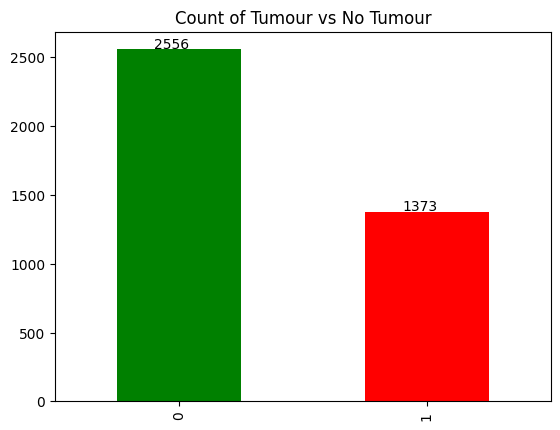

In [146]:
# mask가 존재하면 1(치매), 존재하지 않으면 0(정상)
# mri_df['mask'].value_counts().plot(kind='bar',color=['g','r'],
#                 title='Count of Tumour vs No Tumour')

counts = mri_df['mask'].value_counts()
ax = counts.plot(kind='bar',color=['g','r'], title='Count of Tumour vs No Tumour')
for i, v in enumerate(counts.values):
    ax.text(i - 0.1, v + 10, str(v))

## 이미지 시각화

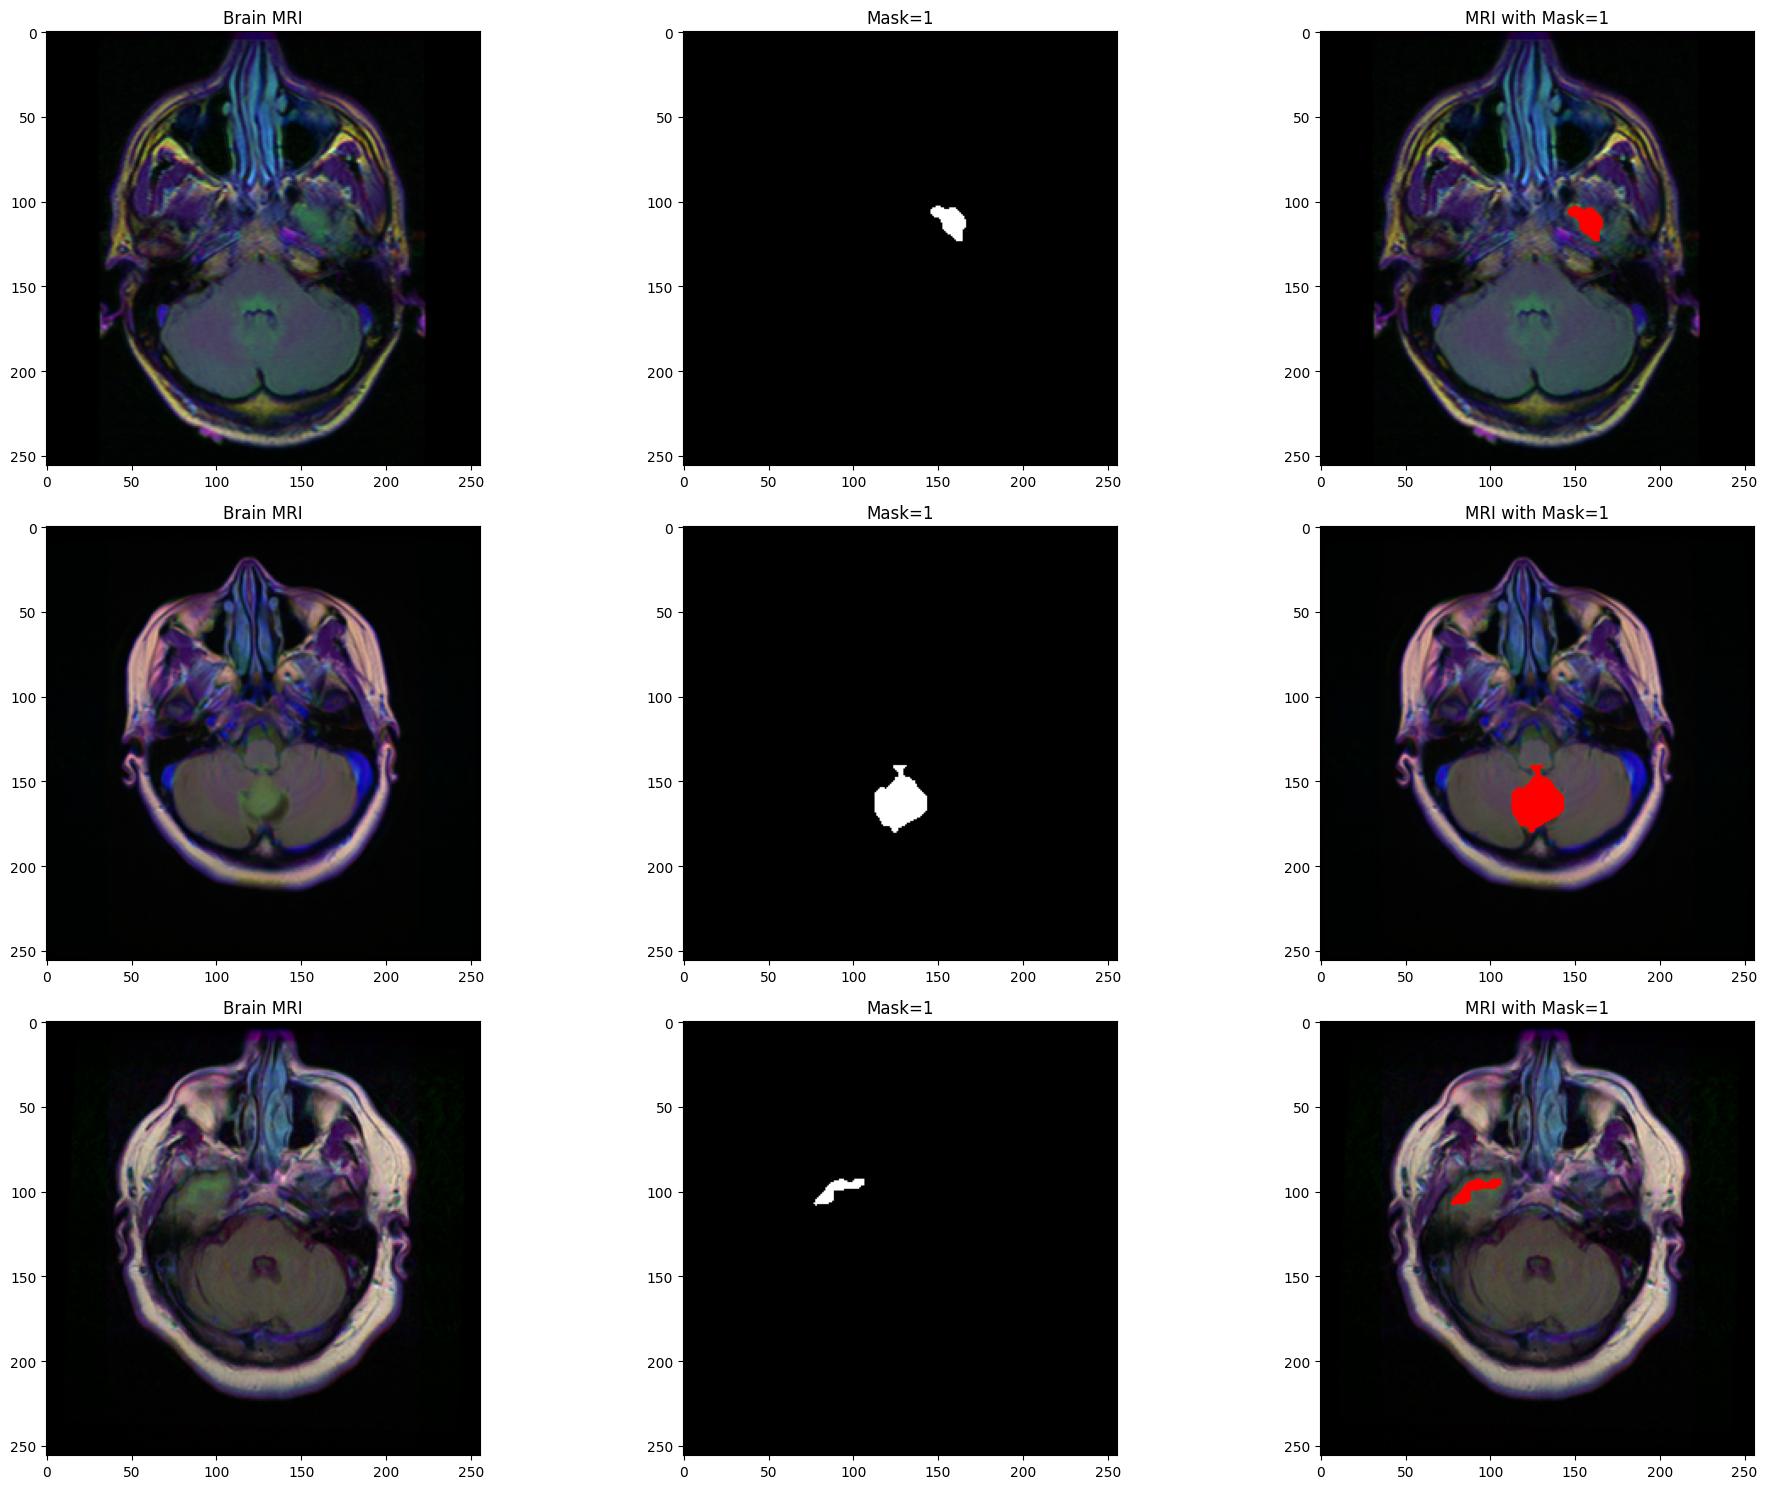

In [147]:
import matplotlib.pyplot as plt 
from skimage import io
# from IPython.display import Image
# from IPython.display import display

count = 0
i = 0
fig, axs = plt.subplots(3,3, figsize=(20,15))
for mask in mri_df['mask']:
    if (mask==1): # mask==1이면 원본이미지, mask, 원본이미지+mask(255Red) 출력 
        img = io.imread(mri_df.img_path[i])
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].imshow(img)

        mask = io.imread(mri_df.mask_path[i])
        axs[count][1].title.set_text("Mask=" + str(mri_df['mask'][i]))
        axs[count][1].imshow(mask, cmap='gray')

        img[mask==255] = (255,0,0)
        axs[count][2].title.set_text("MRI with Mask=" + str(mri_df['mask'][i]))
        axs[count][2].imshow(img)
        count +=1

    i += 1 # img_path[0]~[575]
    if (count==3): # axs[0][0]~[2][2]
        break

fig.tight_layout()


In [148]:
i

575

In [149]:
mri_df.img_path[i]

'../UNet 캐글/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7302_19911203/TCGA_DU_7302_19911203_6.tif'

## Data Generator 
Reference : [UNet](https://github.com/zhixuhao/unet)

In [150]:
from keras_preprocessing.image import ImageDataGenerator

In [151]:
def train_generator(data_frame, batch_size, aug_dict,
        image_color_mode="rgb",
        mask_color_mode="grayscale",
        image_save_prefix='image',
        mask_save_prefix='mask',
        save_to_dir=None,
        target_size=(256,256),
        seed=1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = 'img_path',
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask_path",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix = mask_save_prefix,
        seed = seed)
    
    train_gen = zip(image_generator, mask_generator)

    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)





In [152]:
def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0

    return (img, mask)

In [153]:
train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')
train_gen = train_generator(mri_train, 32,
                                train_generator_args,
                                target_size=(256,256))

val_gen = train_generator(mri_val, 32,
                                dict(),
                                target_size=(256,256))


In [154]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate

def unet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    bn_1 = BatchNormalization(axis=3)(conv1)
    act_1 = Activation('relu')(bn_1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(act_1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv2)
    bn_2 = BatchNormalization(axis=3)(conv2)
    act_2 = Activation('relu')(bn_2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(act_2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv3)
    bn_3 = BatchNormalization(axis=3)(conv3)
    act_3 = Activation('relu')(bn_3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(act_3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv4)
    bn_4 = BatchNormalization(axis=3)(conv4)
    act_4 = Activation('relu')(bn_4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(act_4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv5)
    bn_5 = BatchNormalization(axis=3)(conv5)
    act_5 = Activation('relu')(bn_5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(act_5))
    merge6 = concatenate([conv4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    bn_6 = BatchNormalization(axis=3)(conv6)
    act_6 = Activation('relu')(bn_6)
    
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(act_6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    bn_7 = BatchNormalization(axis=3)(conv7)
    act_7 = Activation('relu')(bn_7)

    
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(act_7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    bn_8 = BatchNormalization(axis=3)(conv8)
    act_8 = Activation('relu')(bn_8)
    
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(act_8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    bn_9 = BatchNormalization(axis=3)(conv9)
    act_9 = Activation('relu')(bn_9)
    
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(act_9)

    model = model = Model(inputs=[inputs] , outputs = [conv10])    
    return model

In [155]:
model = unet()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_107 (Conv2D)            (None, 256, 256, 64  1792        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_108 (Conv2D)            (None, 256, 256, 64  36928       ['conv2d_107[0][0]']             
                                )                                                           

## UNet Model architecture

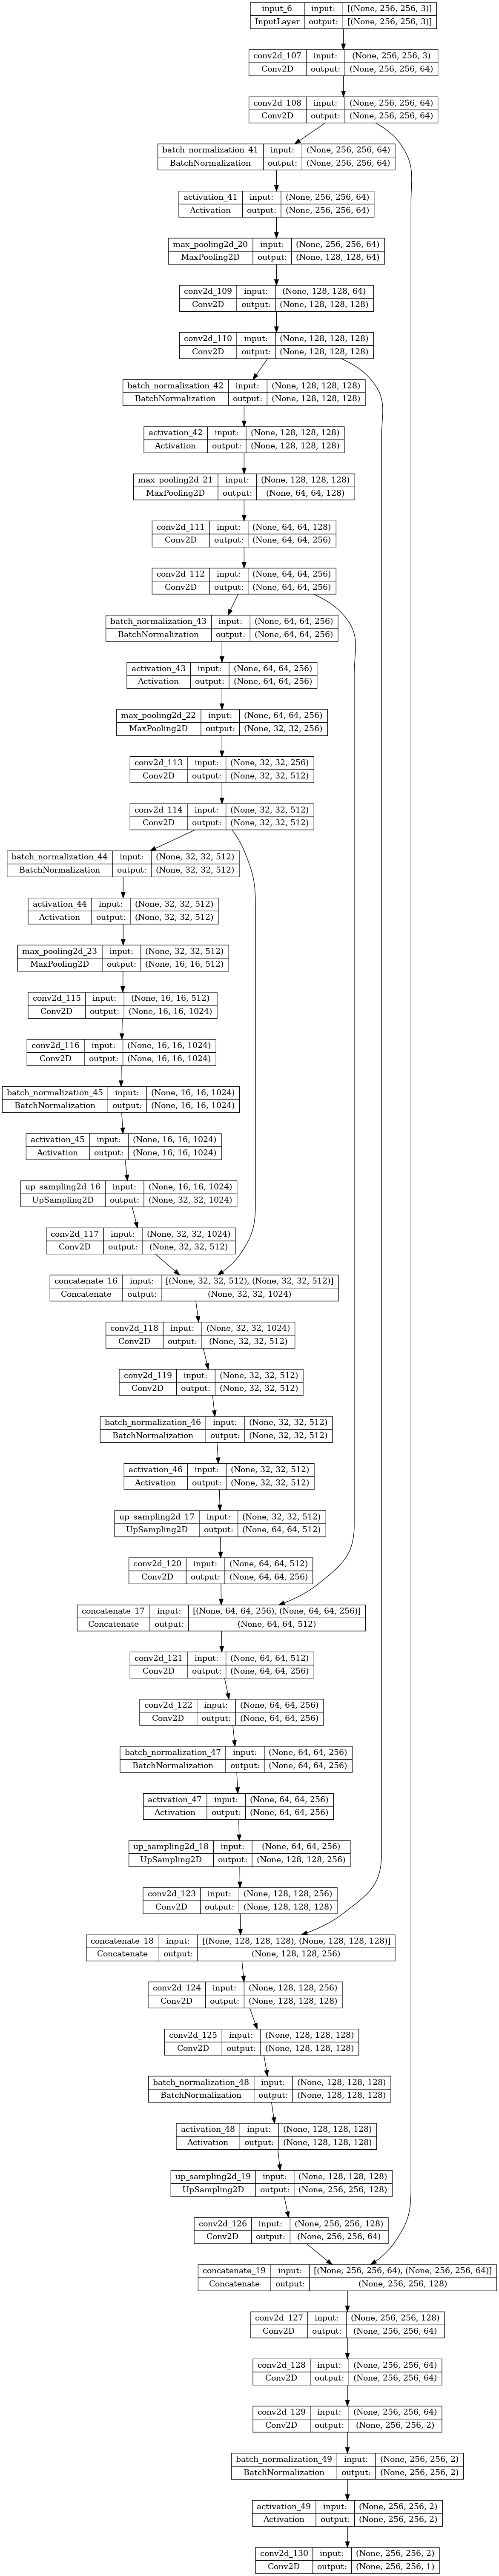

In [156]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='unet_model.png', show_shapes=True)
Image("unet_model.png")

## Callbacks
The Callbacks used are

- Learning Rate reduction
- Early Stopping
- Model Checkpoint

In [157]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_reduction = ReduceLROnPlateau(monitor='val_iou',patience=8, verbose=1,
                                 factor=0.4, min_lr=0.0001)

early_stop = EarlyStopping(monitor='val_iou', min_delta=0.00001, patience=6, 
                           mode='auto', restore_best_weights=True)

model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', verbose=1,monitor='val_iou',
                                   save_best_only=True)

## Performance Metrics

In [158]:
smooth =100
def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

In [159]:
def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))


def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

## Model Fit

In [160]:
EPOCH = 100
learning_rate = 1e-3

In [161]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-3/32, amsgrad=False), 
              loss=dice_coef_loss, metrics=["binary_accuracy", iou, dice_coef])

In [162]:
from tensorflow.keras import backend as K

history = model.fit(train_gen,steps_per_epoch=len(mri_train)/32,
                    epochs=EPOCH ,validation_data=val_gen,validation_steps=len(mri_val) / 32,
                    callbacks=[model_checkpoint])

Found 2828 validated image filenames.
Found 2828 validated image filenames.
Epoch 1/100


2023-04-30 14:56:32.029466: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-30 14:56:32.820540: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


89/88 [==============================] - ETA: 0s - loss: 0.9741 - binary_accuracy: 0.9752 - iou: 0.0132 - dice_coef: 0.0258Found 708 validated image filenames.
Found 708 validated image filenames.

Epoch 1: val_iou improved from inf to 0.01084, saving model to unet_membrane.hdf5
88/88 [==============================] - 101s 1s/step - loss: 0.9741 - binary_accuracy: 0.9752 - iou: 0.0132 - dice_coef: 0.0258 - val_loss: 0.9796 - val_binary_accuracy: 0.9901 - val_iou: 0.0108 - val_dice_coef: 0.0213
Epoch 2/100
10/88 [==>...........................] - ETA: 44s - loss: 0.9726 - binary_accuracy: 0.9899 - iou: 0.0140 - dice_coef: 0.0274